### Number of Islands
---
Given an m x n 2D binary grid grid which represents a map of '1's (land) and '0's (water), return the number of islands.

An island is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.

|Input|Output|Explanation|
|:--|:--|:--|
|grid = [["1","1","1","1","0"],["1","1","0","1","0"],["1","1","0","0","0"],["0","0","0","0","0"]]|1||
|grid = [["1","1","0","0","0"],["1","1","0","0","0"],["0","0","1","0","0"],["0","0","0","1","1"]]|3||
>$Constraints:$  
>- $m == grid.length$
>- $n == grid[i].length$
>- $1 <= m, n <= 300$
>- $grid[i][j]$ $is$ $0$ $or$ $1$

In [1]:
import java.time.Duration;
import java.time.Instant;
import java.util.stream.*;

class Solution {
    public int numIslands(char[][] grid) {
        int answer = 0;

        for(int i : IntStream.range(0, grid.length).toArray()){
            for(int j : IntStream.range(0, grid[0].length).toArray()) {
                if(grid[i][j] == '1') {
                    findIsland (grid, i, j);
                    answer += 1;
                }
            }
        }

        return answer;
    }

    private void findIsland(char[][] grid, int sr, int sc) {
        int[][] dv = {{-1,0}, {1,0}, {0,-1}, {0,1}};
        Queue<int[]> queue = new LinkedList<>();
        queue.add(new int[]{sr,sc});

        while(!queue.isEmpty()){
            int[] rc = queue.poll();
            int curRow = rc[0], curCol = rc[1];
            if(grid[curRow][curCol] == '1') {
                Arrays.stream(dv).filter(E ->
                    curRow + E[0] >= 0 && curRow + E[0] < grid.length &&
                    curCol + E[1] >= 0 && curCol + E[1] < grid[0].length
                ).forEach(E -> queue.add(new int[]{curRow + E[0], curCol + E[1]}));
                grid[curRow][curCol] = '2';
            }
        }
    }
}

In [7]:
char[][] grid = {{'1','1','1'},{'1','1','0'},{'1','0','1'}};
Solution solution = new Solution();

/* Measure execution time */
Instant start = Instant.now();
int answer = solution.numIslands(grid);
Instant finish = Instant.now();

answer

2

In [8]:
Duration.between(start, finish).toMillis();

51

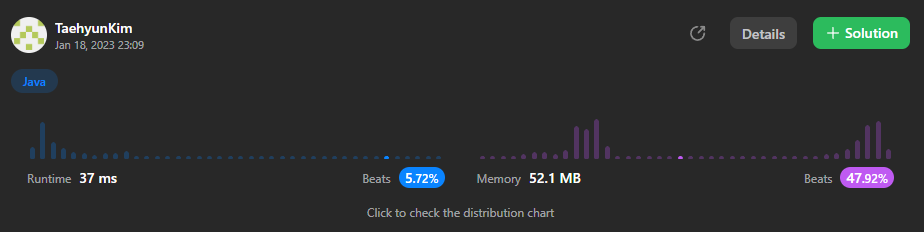

In [4]:
public class RecursiveSolution {
    public int numIslands(char[][] grid) {
        int count = 0;
        
        for (int i = 0; i < grid.length; i++) {
            for (int j = 0; j < grid[i].length; j++) {
                if (grid[i][j] == '1') {
                    count++;
                    clearRestOfLand(grid, i, j);
                }
            }
        }
        return count;
    }
    
    private void clearRestOfLand(char[][] grid, int i, int j) {
        if (i < 0 || j < 0 || i >= grid.length || j >= grid[i].length || grid[i][j] == '0') return;
        
        grid[i][j] = '0';
        clearRestOfLand(grid, i+1, j);
        clearRestOfLand(grid, i-1, j);
        clearRestOfLand(grid, i, j+1);
        clearRestOfLand(grid, i, j-1);
        return;
    }
}

In [5]:
char[][] grid = {{'1','1','1'},{'1','1','0'},{'1','0','1'}};
RecursiveSolution recursiveSolution = new RecursiveSolution();

/* Measure execution time */
Instant start = Instant.now();
int answer = recursiveSolution.numIslands(grid);
Instant finish = Instant.now();

answer

2

In [6]:
Duration.between(start, finish).toMillis();

57